# Exercises - GEO4902-04 - Verification

[Save as jupyter notebook, with your name in the filename, and upload on canvas]

# Exercise 04-01 - Analysis of point forecast

In [1]:
# import packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error # used to calculate RMSE
from scipy.signal import savgol_filter
import matplotlib.dates as mdates

In [2]:
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Tomato, SteelBlue, LimeGreen, Gold
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF6347', '#4682B4', '#32CD32', '#FFD700'][::-1])
plt.rcParams.update({
    'axes.facecolor': '#2E2E2E',   
    'figure.facecolor': '#2E2E2E', 
    'grid.color': '#4D4D4D',       
    'text.color': 'white',         
    'axes.labelcolor': 'lightgray', 
    'xtick.color': 'lightgray',    
    'ytick.color': 'lightgray'     
})

In [3]:
# import temperature and wind data
st1_temp = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99735temp.csv") #Edgeøya - Kapp Heuglin, Svalbard                
st2_temp = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99754temp.csv") #Hornsund, Svalbard
st1_wind = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99735wind.csv")                 
st2_wind = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99754wind.csv") 

In [4]:
st1_temp['time'] = pd.to_datetime(st1_temp['time'])
st2_temp['time'] = pd.to_datetime(st2_temp['time'])
st1_wind['time'] = pd.to_datetime(st1_wind['time'])
st2_wind['time'] = pd.to_datetime(st2_wind['time'])

In [5]:
# set time as index 
# drop=True: Delete columns to be used as the new index.
# inplace=True: If True, modifies the DataFrame in place (do not create a new object).
st1_temp.set_index('time', drop=True, inplace=True)
st2_temp.set_index('time', drop=True, inplace=True)
st1_wind.set_index('time', drop=True, inplace=True)
st2_wind.set_index('time', drop=True, inplace=True)


1.1 Plot as time series the model and observation together in one plot. (for both wind and temperature)

In [6]:
def K2C(kelvin):
    """
    Converts Kelvin to Celsius
    """
    return kelvin - 273.15

st1_temp['model'] = K2C(st1_temp['model'])
st2_temp['model'] = K2C(st2_temp['model'])

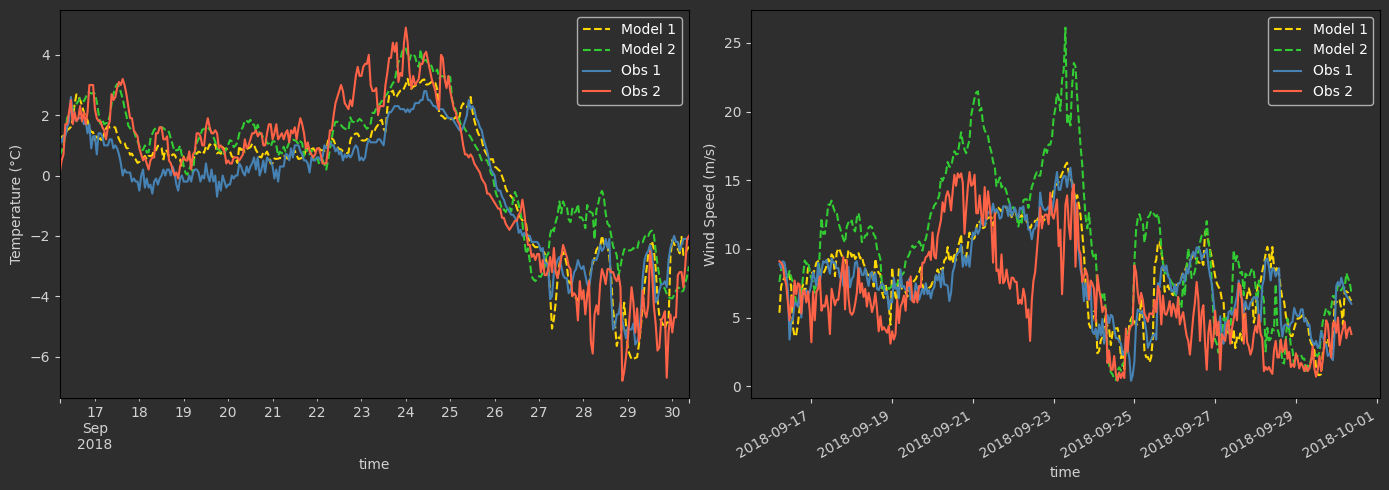

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
st1_temp['model'].plot(label='Model 1', ls='--', legend=True)
st2_temp['model'].plot(label='Model 2', ls='--', legend=True)
st1_temp['obs'].plot(label='Obs 1', legend=True)
st2_temp['obs'].plot(label='Obs 2', legend=True)
plt.ylabel('Temperature (°C)')
plt.tight_layout()


plt.subplot(1,2,2)
st1_wind['model'].plot(label='Model 1', ls='--', legend=True)
st2_wind['model'].plot(label='Model 2', ls='--', legend=True)
st1_wind['obs'].plot(label='Obs 1', legend=True)
st2_wind['obs'].plot(label='Obs 2', legend=True)
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

1.2 Can you find out if the errors are conditional or not? Describe for all four observations/models. (You can look in the lecture slides for more details on conditional errors.)

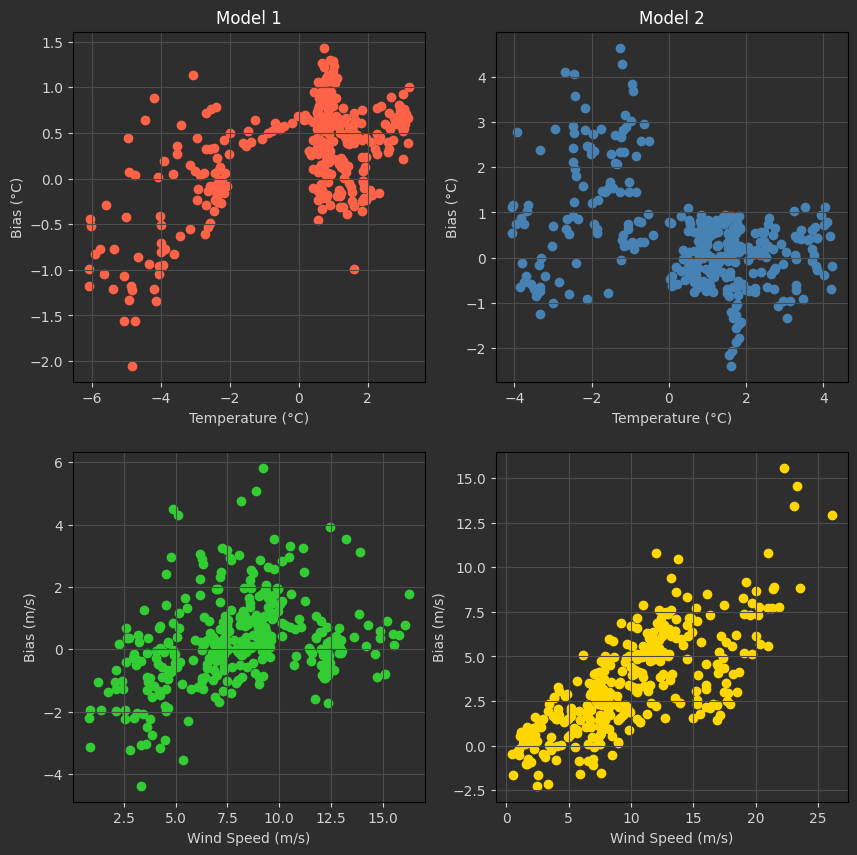

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('Model 1')
tbias1 = st1_temp['model'] - st1_temp['obs']
plt.scatter(st1_temp['model'], tbias1, c= colors[0])
plt.xlabel('Temperature (°C)')
plt.ylabel('Bias (°C)')
plt.grid()

plt.subplot(2,2,2)
plt.title('Model 2')
tbias2 = st2_temp['model'] - st2_temp['obs']
plt.scatter(st2_temp['model'], tbias2, c= colors[1])
plt.xlabel('Temperature (°C)')
plt.ylabel('Bias (°C)')
plt.grid()

plt.subplot(2,2,3)
wbias1 = st1_wind['model'] - st1_wind['obs']
plt.scatter(st1_wind['model'], wbias1, c= colors[2])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Bias (m/s)')
plt.grid()

plt.subplot(2,2,4)
wbias2 = st2_wind['model'] - st2_wind['obs']
plt.scatter(st2_wind['model'], wbias2, c= colors[3])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Bias (m/s)')
plt.grid()

Here the bias is computed as
$$
\text{Bias} = \text{Model} - \text{Observation}
$$

Fist considering temperature,we see that for **Model 1**, the bias has a tendency to be negative for negative temperatures and positive for positive temperatures. **Model 2** shows a slight tendency towards more positive bias for negative temperatures whilst it shows no specific tendency for positive temperatures except for values just over -2 °C where there is a negative bias.

Now looking at wind speeds; both models exhibit a clear tendency for a negative bias for low wind speeds and an increasingly positive bias for higher velocities.

In conclusion the errors *are conditional* since they depend on forecast conditions rather than being independently distributed.

1.3 Calculate the bias and root mean square error (RMSE)

We compute the full forecast bias as
$$
b = \frac{1}{N} \sum_{i=1}^N (x_i - y_i)
$$
where we use $N$ observations $y_i$ and corresponding model values $x_i$.

In [9]:
def bias(mod, obs):
    N = mod.shape[0]
    b = (1 / N) * np.sum(mod - obs)
    return b

t_bias_m1 = bias(st1_temp['model'], st1_temp['obs'])
print(f'Model 1, Temperature Bias: {t_bias_m1}')

t_bias_m2 = bias(st2_temp['model'], st2_temp['obs'])
print(f'Model 2, Temperature Bias: {t_bias_m2}')

w_bias_m1 = bias(st1_wind['model'], st1_wind['obs'])
print(f'Model 1, Wind Speed Bias: {w_bias_m1}')

w_bias_m2 = bias(st2_wind['model'], st2_wind['obs'])
print(f'Model 2, wind Speed Bias: {w_bias_m2}')

Model 1, Temperature Bias: 0.2538730833887219
Model 2, Temperature Bias: 0.4029635342684872
Model 1, Wind Speed Bias: 0.2642387790862553
Model 2, wind Speed Bias: 3.587759688024745


The root mean squared error (RMSE) is computed as
$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - y_i)^2}
$$
using the same notation as for the bias above.

In [10]:
def RMSE(mod, obs):
    N = mod.shape[0]
    rmse = np.sqrt((1 / N) * np.sum((mod - obs)**2))
    return rmse

t_rmse_m1 = RMSE(st1_temp['model'], st1_temp['obs'])
print(f'Model 1, Temperature RMSE: {t_rmse_m1}')

t_rmse_m2 = RMSE(st2_temp['model'], st2_temp['obs'])
print(f'Model 2, Temperature RMSE: {t_rmse_m2}')

w_rmse_m1 = RMSE(st1_wind['model'], st1_wind['obs'])
print(f'Model 1, Wind Speed RMSE: {w_rmse_m1}')

w_rmse_m2 = RMSE(st2_wind['model'], st2_wind['obs'])
print(f'Model 2, wind Speed RMSE: {w_rmse_m2}')

Model 1, Temperature RMSE: 0.6173991573226767
Model 2, Temperature RMSE: 1.190490168014841
Model 1, Wind Speed RMSE: 1.4738936339513473
Model 2, wind Speed RMSE: 4.583219928939333


1.4 Remove the bias and compute the RMSE again. 

In [11]:
st1_model_temp_wo_bias = st1_temp['model'] - t_bias_m1
st2_model_temp_wo_bias = st2_temp['model'] - t_bias_m2

st1_model_wind_wo_bias = st1_wind['model'] - w_bias_m1
st2_model_wind_wo_bias = st2_wind['model'] - w_bias_m2


t_rmse_m1_wo_bias = RMSE(st1_model_temp_wo_bias, st1_temp['obs'])
print(f'Model 1 w/o bias, Temperature RMSE: {t_rmse_m1_wo_bias}')

t_rmse_m2_wo_bias = RMSE(st2_model_temp_wo_bias, st2_temp['obs'])
print(f'Model 2 w/o bias, Temperature RMSE: {t_rmse_m2_wo_bias}')

w_rmse_m1_wo_bias = RMSE(st1_model_wind_wo_bias, st1_wind['obs'])
print(f'Model 1 w/o bias, Wind Speed RMSE: {w_rmse_m1_wo_bias}')

w_rmse_m2_wo_bias = RMSE(st2_model_wind_wo_bias, st2_wind['obs'])
print(f'Model 2 w/o bias, wind Speed RMSE: {w_rmse_m2_wo_bias}')

Model 1 w/o bias, Temperature RMSE: 0.5627878614482142
Model 2 w/o bias, Temperature RMSE: 1.1202174923602355
Model 1 w/o bias, Wind Speed RMSE: 1.450013900564168
Model 2 w/o bias, wind Speed RMSE: 2.8519967282609646


Here we see that removing the bias from model values reduces the RMSE.

1.5 Smooth the time series of the de-biased wind observations.

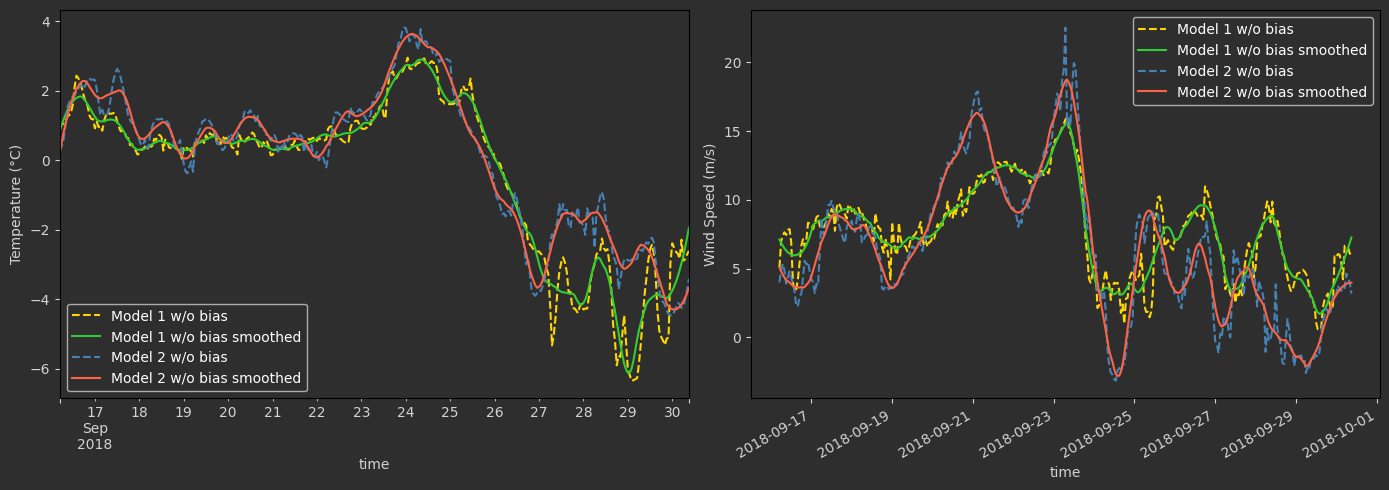

In [12]:
# Smoothing with savgol filter
smoothed_st1_model_temp_wo_bias = pd.Series(
    savgol_filter(st1_model_temp_wo_bias, 25, 2), 
    index=st1_model_temp_wo_bias.index
)
smoothed_st2_model_temp_wo_bias = pd.Series(
    savgol_filter(st2_model_temp_wo_bias, 25, 2), 
    index=st2_model_temp_wo_bias.index
)
smoothed_st1_model_wind_wo_bias = pd.Series(
    savgol_filter(st1_model_wind_wo_bias, 25, 2), 
    index=st1_model_wind_wo_bias.index
)
smoothed_st2_model_wind_wo_bias = pd.Series(
    savgol_filter(st2_model_wind_wo_bias, 25, 2), 
    index=st2_model_wind_wo_bias.index
)


plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
st1_model_temp_wo_bias.plot(label='Model 1 w/o bias', ls='--', legend=True)
smoothed_st1_model_temp_wo_bias.plot(label='Model 1 w/o bias smoothed', legend=True)
st2_model_temp_wo_bias.plot(label='Model 2 w/o bias', ls='--', legend=True)
smoothed_st2_model_temp_wo_bias.plot(label='Model 2 w/o bias smoothed', legend=True)
plt.ylabel('Temperature (°C)')
plt.tight_layout()


plt.subplot(1,2,2)
st1_model_wind_wo_bias.plot(label='Model 1 w/o bias', ls='--', legend=True)
smoothed_st1_model_wind_wo_bias.plot(label='Model 1 w/o bias smoothed', legend=True)
st2_model_wind_wo_bias.plot(label='Model 2 w/o bias', ls='--', legend=True)
smoothed_st2_model_wind_wo_bias.plot(label='Model 2 w/o bias smoothed', legend=True)
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

The figure above shows de-biased model predicted values as well as a smoothed version using a Savitzky-Golay filter. The filter is implemented using second order polynomials and a window length of 25. 

In [13]:
# recalculting rmse with smoothed data
smoothed_t_rmse_m1_wo_bias = RMSE(smoothed_st1_model_temp_wo_bias, st1_temp['obs'])
print(f'Model 1 smoothed w/o bias, Temperature RMSE: {smoothed_t_rmse_m1_wo_bias}')

smoothed_t_rmse_m2_wo_bias = RMSE(smoothed_st2_model_temp_wo_bias, st2_temp['obs'])
print(f'Model 2 smoothed w/o bias, Temperature RMSE: {smoothed_t_rmse_m2_wo_bias}')

smoothed_w_rmse_m1_wo_bias = RMSE(smoothed_st1_model_wind_wo_bias, st1_wind['obs'])
print(f'Model 1 smoothed w/o bias, Wind Speed RMSE: {smoothed_w_rmse_m1_wo_bias}')

smoothed_w_rmse_m2_wo_bias = RMSE(smoothed_st2_model_wind_wo_bias, st2_wind['obs'])
print(f'Model 2 smoothed w/o bias, wind Speed RMSE: {smoothed_w_rmse_m2_wo_bias}')

Model 1 smoothed w/o bias, Temperature RMSE: 0.5353707488914696
Model 2 smoothed w/o bias, Temperature RMSE: 1.113516367489221
Model 1 smoothed w/o bias, Wind Speed RMSE: 1.2031295575439993
Model 2 smoothed w/o bias, wind Speed RMSE: 2.634716061361491


The smoothed data results in and even lower RMSE in all cases. 

Coarser resolution models average over larger spatial or temporal scales, smoothing out fluctuations similarly to the Savitzky-Golay filtering. Therefore, coarser models may achieve a lower RMSE, although the higher resolution model actually captures the real physical processes better.

# Exercise 04-02 - Categorical verification

![Contingency table for forecasts of tornados (Finley 1884)](contingency.png)


2.1 Compute the fraction correct, frequency bias, probability of detection, threat score, and equitable threat score. For each score, write a sentence or two how this value can be interpreted.

In [14]:
# Contingency table
hits = 28; false_alarms = 72; forecast_yes = 100
misses = 23; correct_negatives = 2680; forecast_no = 2703
observed_yes = 51; observed_no = 2752; total = 2803

In [15]:
fraction_correct = (hits + correct_negatives) / total
fraction_correct

0.9661077417053158

The *fraction correct* can be interpreted as a fraction probability of the forecast being correct; both for true positives and true negatives. Here, it is correct about 97% of the time, but this method can be problematic if assessing rare events since it is dominated by *correct negatives*.

In [16]:
frequency_bias = (hits + false_alarms) / (hits + misses)
frequency_bias

1.9607843137254901

The *frequency bias* gives an indication of under- or over.prediction. A value of one would be an unbiased model. Here, the value of 1.96 indicates over-prediction of tornadoes. It is the ratio of predicted events to observed events.

In [17]:
probability_of_detection = hits / (hits + misses)
probability_of_detection

0.5490196078431373

*Probability of detection* measures how well the model identifies actual events. A value of 1 equates to detecting all events perfectly, whilst 0 would mean that the model fails to detect any true events. The value of 0.55 indicates that the model captures just over half of the actual tornadoes.

In [18]:
threat_score = hits / (hits + misses + false_alarms)
threat_score

0.22764227642276422

Often used as a performance measure for rare events, the *threat score* can be interpreted as the fraction of correctly forecast events from the ones that were either forecast or observed (ignoring *correct negatives* compared to the *fraction correct*). 1 would be a perfect forecast score. This is useful in cases where both missed detections and false alarms want to be considered as a measure of performance. In our case the model in predicting 23% of the actual tornadoes correctly.

In [19]:
hits_random = ((hits + misses) * (hits + false_alarms)) / total

equitable_threat_score = (hits - hits_random) / (hits + misses + false_alarms + hits_random)
equitable_threat_score

0.20974707676301702

The *equitable threat score* is a modification of the *threat score* which also includes the *hits* which would occur purely by chance. Here *hits_random* can be viewed as the random hits one expects form a forecast independent of observations.

As for the *threat score*, 1 would be a perfect forecast. A score of 0 would mean that the model is no better than random chance. A negative value means that the model is worse than just guessing. Here we see that accounting for randomness the model predicts 21% of tornadoes correctly. This is worse than the 23% correct prediction computed with the *threat score*.

2.2 It was pointed out by Gilbert (1884) that the fraction correct score can be manipulated if just “no tornado” is forecasted. Provide the contingency table for this situation and calculate the fraction correct score to verify Gilberts’s critique. 

![Contingency table for forecasts of no tornados](contingency_no_tornado.png)


In [20]:
# Contingency table for a "no tornado" forecast
hits = 0; false_alarms = 0; forecast_yes = 0
misses = 51; correct_negatives = 2752; forecast_no = 2803
observed_yes = 51; observed_no = 2752; total = 2803

In [21]:
fraction_correct = (hits + correct_negatives) / total
fraction_correct

0.981805208704959

By just always forecasting "no tornado" the *fraction correct* increases to 0.98. This clearly supports Gilbert's critique of the *fraction correct* since the metric indicates a great forecast skill when in reality there is zero skill involved.

2.3 The results of Gilbert led to the development of more meaningful verification scores. And the Equitable threat score is also called the Gilbert skill score. What is the ETS in case of the manipulated contingency table?

In [22]:
hits_random = ((hits + misses) * (hits + false_alarms)) / total

equitable_threat_score = (hits - hits_random) / (hits + misses + false_alarms + hits_random)
equitable_threat_score

0.0

The *equitable threat score* (ETS) on the other hand is now 0, reflecting the true skill of the forecast. This highlights the flaws of the *fraction correct* and dire need for more meaningful verification scores such as the ETS.